**Model de semgmenation avec segmentation_models**

In [ ]:
!pip list

!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-6asbi748
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-6asbi748
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.9 MB/s eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33806 sha256=63c31dbf685a0be9787828775b8916a8721e4e46cf83ba8c810f2aa3f87d5e81
  Stored in directory: /tmp/pip-ephem-wheel-cache-i82ltmx3/wheels/7e/e5/3d/85e32947c53e03f210361da47652f05b6f4e1c3e58f20e0ae3
Successfully built segmentation-models


In [ ]:

import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
from tensorflow import keras
import segmentation_models as sm

In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm

BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)


In [ ]:
#Resizing images is optional, CNNs are ok with large images
SIZE_X = 256 #Resize images (height  = X, width = Y)
SIZE_Y = 256


In [ ]:
#!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-4oi8mnff
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-4oi8mnff
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done


In [ ]:
train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/Model_Xrays/images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        #img = cv2.resize(img, (SIZE_Y, SIZE_X))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
#Convert list to array for machine learning processing        
train_images = np.array(train_images)


In [ ]:
train_masks = [] 
for directory_path in glob.glob("/content/drive/MyDrive/Model_Xrays/Masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

In [ ]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3) #May not be necessary.. leftover from previous code 


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:

# preprocess input

x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [ ]:
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

85521592/85521592 [==============================] - 23s 0us/step


In [ ]:
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

In [ ]:

history=model.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=20,
          verbose=1,
          validation_data=(x_val, y_val))


Epoch 1/5
25/25 [==============================] - 48s 395ms/step - loss: -262.2489 - mse: 19848.2812 - val_loss: -1507.6112 - val_mse: 19057.4922
Epoch 2/5
25/25 [==============================] - 4s 152ms/step - loss: -552.6208 - mse: 19836.2422 - val_loss: -11437.0312 - val_mse: 18970.6445
Epoch 3/5
25/25 [==============================] - 4s 154ms/step - loss: -820.6835 - mse: 19831.6680 - val_loss: -7131.6064 - val_mse: 18974.8359
Epoch 4/5
25/25 [==============================] - 4s 156ms/step - loss: -1189.2809 - mse: 19830.1641 - val_loss: -9417.5215 - val_mse: 18972.5234
Epoch 5/5
25/25 [==============================] - 4s 151ms/step - loss: -1724.7227 - mse: 19832.7773 - val_loss: -15543.8320 - val_mse: 18973.8945


In [ ]:
accuracy = model.evaluate(x_val, y_val)


2/2 [==============================] - 6s 2s/step - loss: -15543.8350 - mse: 18973.8945


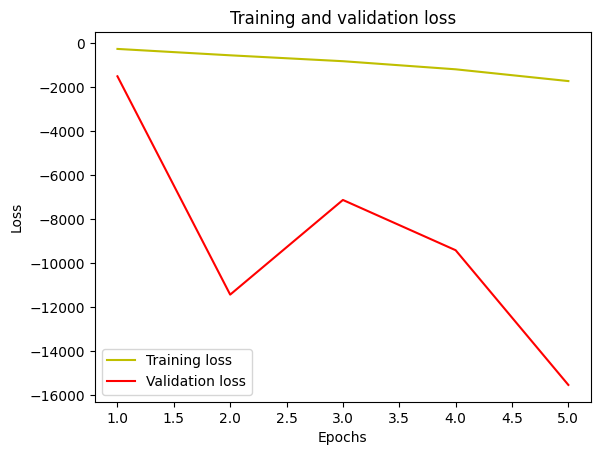

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/model_seg_uvs/test_laye_uvs_seg.h5')


**Test en ineference sur quelques images**

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/model_seg_uvs/test_laye_uvs_seg.h5', compile=False)
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/content/drive/MyDrive/Model_Xrays/images/JPCLN003.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X), interpolation=cv2.INTER_AREA)

test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)



1/1 [==============================] - 1s 705ms/step


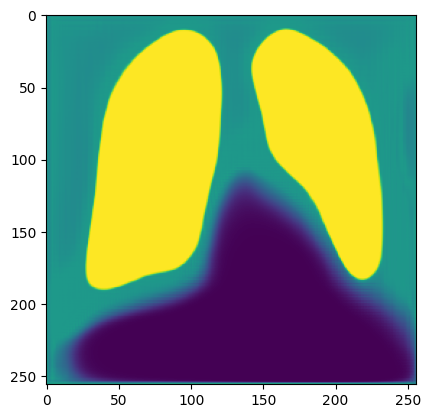

In [ ]:
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image )
plt.imsave('/content/drive/MyDrive/model_seg_uvs/test_01uvs.jpg', prediction_image)



**Models UNET**

In [ ]:
# multiclass segmentation with non overlapping class masks (your classes + background)
model_01 = sm.Unet('resnet34', classes=1, activation='sigmoid')

In [ ]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
)


In [ ]:
model_01.compile(optimizer=opt, loss='binary_crossentropy', metrics=['mse'])

In [ ]:

history=model_01.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val))


Epoch 1/10
25/25 [==============================] - 31s 213ms/step - loss: -360.9248 - mse: 19844.3418 - val_loss: -66632.4766 - val_mse: 18965.5859
Epoch 2/10
25/25 [==============================] - 4s 160ms/step - loss: -754.3480 - mse: 19835.3125 - val_loss: -57175.4531 - val_mse: 18965.6191
Epoch 3/10
25/25 [==============================] - 4s 165ms/step - loss: -1126.8519 - mse: 19833.0488 - val_loss: -33845.9609 - val_mse: 18966.1426
Epoch 4/10
25/25 [==============================] - 4s 166ms/step - loss: -1572.5409 - mse: 19830.5410 - val_loss: -37854.4102 - val_mse: 18966.1035
Epoch 5/10
25/25 [==============================] - 4s 161ms/step - loss: -2191.6069 - mse: 19830.2773 - val_loss: -23373.8848 - val_mse: 18966.7441
Epoch 6/10
25/25 [==============================] - 4s 165ms/step - loss: -2874.0203 - mse: 19830.9258 - val_loss: -16973.4434 - val_mse: 18968.7617
Epoch 7/10
25/25 [==============================] - 4s 162ms/step - loss: -3622.0713 - mse: 19829.6074 - va

In [ ]:
model_01.save('/content/drive/MyDrive/model_seg_uvs/test_laye_uvs_seg_01.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/model_seg_uvs/test_laye_uvs_seg_01.h5', compile=False)
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/content/drive/MyDrive/Model_Xrays/subset/train/images/JPCLN007.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X), interpolation=cv2.INTER_AREA)

test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)


1/1 [==============================] - 1s 709ms/step


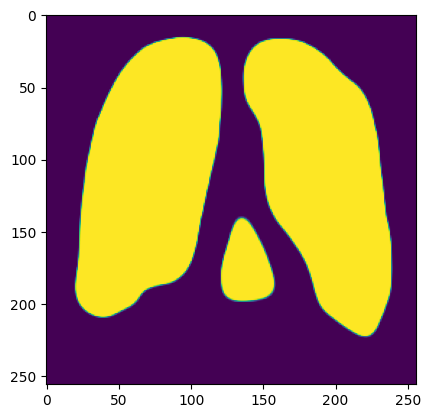

In [ ]:
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image )
plt.imsave('test_model2.jpg', prediction_image)

**TEST ave UNET depuis segmentation_models**

In [ ]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
model = Unet('resnet152', encoder_weights='imagenet')

In [ ]:

model = Unet('resnet152', encoder_weights='imagenet')

In [ ]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

BACKBONE1= 'resnet152'
preprocess_input = get_preprocessing(BACKBONE1)

In [ ]:
#Capture training image info as a list
train_image = []

for directory_path in glob.glob("/content/drive/MyDrive/Model_Xrays/images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        #img = cv2.resize(img, (SIZE_Y, SIZE_X))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_image.append(img)
        #train_labels.append(label)
#Convert list to array for machine learning processing        
train_image = np.array(train_image)
train_mask = [] 
for directory_path in glob.glob("/content/drive/MyDrive/Model_Xrays/Masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_mask.append(mask)
        #train_labels.append(label)
#Convert list to array for machine learning processing          
train_mask = np.array(train_mask)
X = train_image
Y = train_mask
Y = np.expand_dims(Y, axis=3) #May not be necessary.. leftover from previous code 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)
model5 = Unet('resnet152', encoder_weights='imagenet')
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

In [ ]:
hist=model5.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=20,
          verbose=1,
          validation_data=(x_val, y_val))

In [ ]:
model5.save('laye5.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('laye5.h5', compile=False)
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/content/drive/MyDrive/Model_Xrays/images/JPCLN014.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X), interpolation=cv2.INTER_AREA)

test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image )
plt.imsave('test5_model2.jpg', prediction_image)


In [ ]:
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image )
plt.imsave('test5_model2.jpg', prediction_image)

In [ ]:
accuracy1 = model5.evaluate(x_val, y_val)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

################################################################
def simple_unet_model(shape):
#Build the model
    inputs = Input(shpae=(256,256,1))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:

def get_model():
    return simple_unet_model(shape)

In [ ]:
model = get_model()

In [ ]:
model=simple_unet_model(shape)

In [ ]:


from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


image_directory = '/content/drive/MyDrive/Model_Xrays/images/'
mask_directory = '/content/drive/MyDrive/Model_Xrays/Masks/'


SIZE = 256
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

images = os.listdir(image_directory)
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'png'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))


#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

###############################################################
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()


#If starting with pre-trained weights. 
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')

history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

model.save('mitochondria_test.hdf5')

############################################################
#Evaluate the model


	# evaluate model
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
#acc = history.history['accuracy']
val_acc = history.history['val_acc']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##################################
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

#######################################################################
#Predict on a few images

In [ ]:
model = get_model()
model.load_weights('mitochondria_50_plus_100_epochs.hdf5') #Trained for 50 epochs and then additional 100
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')  #Trained for 50 epochs

test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

test_img_other = cv2.imread('data/test_images/02-1_256.tif', 0)
#test_img_other = cv2.imread('data/test_images/img8.tif', 0)
test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)

#Predict and threshold for values above 0.5 probability
#Change the probability threshold to low value (e.g. 0.05) for watershed demo.
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.2).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('External Image')
plt.imshow(test_img_other, cmap='gray')
plt.subplot(235)
plt.title('Prediction of external Image')
plt.imshow(prediction_other, cmap='gray')
plt.show()

#plt.imsave('input.jpg', test_img[:,:,0], cmap='gray')
#plt.imsave('data/results/output2.jpg', prediction_other, cmap='gray')